# ECON 5821: Numerical Optimization

Zhentao Shi

<img src="graph/chongchicollege.png" width="1000">


<!-- code is tested on SCRP -->

## Optimization 

* Economics curriculum does not pay enough attention to numerical optimization
* Most estimators solve optimization

* Operational research
* Understand the essence

### User Cases

* Maximum likelihood estimation
* Discrete / mixed data type
* Machine learning / regularization
* Classification
* Neural networks


* Generic optimization problem

$$
\min_{\theta \in \Theta } f(\theta) \,\, \mathrm{ s.t. }\,\,  g(\theta) = 0,\, h(\theta) \leq 0,
$$

* $f(\cdot)\in \mathbb{R}$: criterion function
* $g(\theta) = 0$: a vector of equality constraints
* $h(\theta)\leq 0$: a vector of inequality constraints.


* unconstrained
* constrained
* Lagrangian 

### Convenience vs. Efficiency

* Convenience: readability of the mathematical expressions and the code
* Efficiency:  computing speed

* Put convenience as priority at the trial-and-error stage, 
* Improve efficiency when necessary at a later stage for full-scale execution.

## Methods

* Many optimization algorithms
* Variants of a few fundamental principles.


## Newton's Method

* Essential idea for optimizing a twice-differentiable objective function
* Necessary condition: the first-order condition

$$
s(\theta) = \partial f(\theta) / \partial \theta = 0
$$

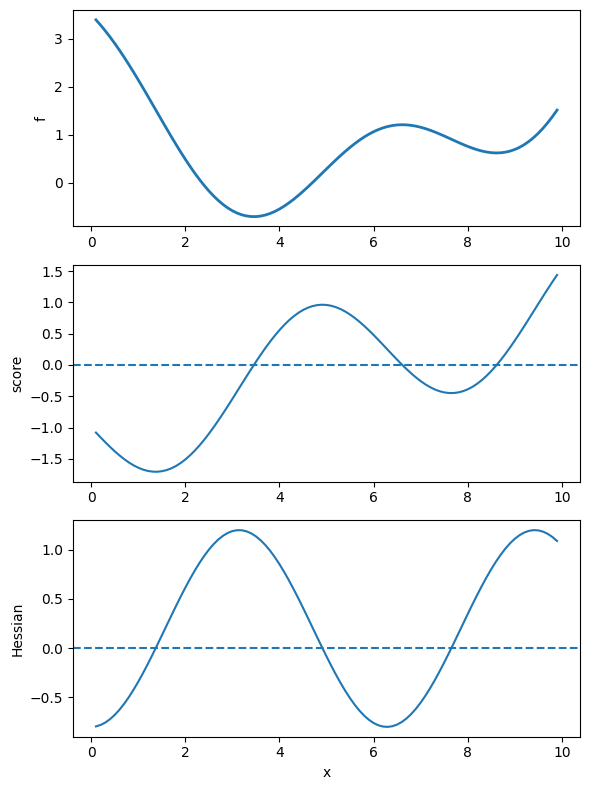

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define functions
def f(x):
    return 0.1 * (x - 5) ** 2 + np.cos(x)

def s(x):
    return 0.2 * (x - 5) - np.sin(x)

def h(x):
    return 0.2 - np.cos(x)

# create x array
x_base = np.arange(0.1, 10, 0.1)

# create plots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

axs[0].plot(x_base, f(x_base), linewidth=2)
axs[0].set_ylabel('f')

axs[1].plot(x_base, s(x_base))
axs[1].axhline(y=0, linestyle='--')
axs[1].set_ylabel('score')

axs[2].plot(x_base, h(x_base))
axs[2].axhline(y=0, linestyle='--')
axs[2].set_ylabel('Hessian')
axs[2].set_xlabel('x')

plt.tight_layout()
plt.show()

### Iteartions

* Initial trial value $\theta_0$, 
* If $s(\theta_0) \neq 0$, updated by

$$
\theta_{t+1} = \theta_{t} -  \left( H(\theta_t)  \right)^{-1}  s(\theta_t)
$$

for the index of iteration $t=0,1,\cdots$
* $H(\theta) = \frac{ \partial^2 s(\theta) }  {\partial \theta \partial \theta'} = \frac{ \partial s(\theta )}{ \partial \theta'}$ is the Hessian.  


### Mechanism

* Consider a $\theta_t$ close to the optimal value $\theta^{\star}$.
* Taylor expansion
at $\theta_t$ round  $\theta_{\star}$, a root of $s(\cdot)$. 

* Because $\theta_{ \star }$  is a root,

$$
0 = s(\theta_{\star}) = s(\theta_t) + H(\theta_t) (\theta_{\star} - \theta_t) + O( (\theta_{\star} - \theta_t)^2 ).
$$



### Update

* Ignore the high-order term and rearrange,

$$
\theta_{\star} = \theta_{t} -  \left( H(\theta_t)  \right)^{-1}  s(\theta_t)
$$ 

* iteration formula by replacing $\theta_{\star}$ with the updated $\theta_{t+1}$. 
* Iterate until $|\theta_{t+1} -\theta_{t}| < \epsilon$ (absolute criterion) and/or
$|\theta_{t+1} -\theta_{t}|/|\theta_{t}| < \epsilon$ (relative criterion), 
* $\epsilon$ is a small positive number chosen as a tolerance level.


In [2]:
def Newton(x):
    return x - s(x) / h(x)

In [3]:
x_init = 6 # can experiment with various initial values

gap = 1
epsilon = 0.001  # tolerance
while gap > epsilon:
    x_new = Newton(x_init)
    print(x_new)
    gap = abs(x_init - x_new)
    x_init = x_new

6.6306685575825846
6.611216774253945
6.611301507665787


## Features of Newton's Method


* It seeks the solution to $s(\theta) = 0$
* The first-order condition is necessary but not sufficient
* Verify the second-order condition
* Compare the value of multiple minima for global minimum

* It requires gradient $s(\theta)$ and the Hessian $H(\theta)$.
* It numerically converges at quadratic rate.

## Quasi-Newton Method

* Most well-known quasi-Newton algorithm is [BFGS](http://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)
* It avoids explicit calculation of Hessian
* It starts from an initial (inverse) Hessian
* Updates Hessian by an explicit formula via quadratic approximation

## Gradient Descent

* Completely ignore the Hessian. Replace it by the identity matrix.


$$
\theta_{t+1} = \theta_{t} -  \alpha_t \cdot  s(\theta_t)
$$

where $\alpha_t > 0$ is the **learning rate**.

* Linear rate of convergence.
* Less costly in computation. Better for big data.

* **Motivation**: Talyor expansion,

$$
f(\theta_{t+1}) = f(\theta_t + a_t \cdot p_t ) \approx f(\theta_t) + a_t \cdot  p_t' s(\theta_t),
$$

* If in each step we want the value of the criterion function
$f(x)$ to decrease, we need $ p_t' s(\theta_t) \leq 0$.

* A simple choice is $p_t =-s(\theta_t)$, which is called the deepest decent.

* The learning rate is a tuning parameter. 
  * In practice, just choose a small number, say $0.01$ or $0.001$.
  * A small learning rate makes a small step ahead in each iteration


## Derivative-Free Method

* [Nelder-Mead](http://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)
* Simplex method
* Search a local minimum 
  * reflection
  * expansion
  * contraction


### Example

* Pseudo Poisson maximum likelihood estimation (PPML)
* Popular estimator for cross-country bilateral trade
* Conditional mean model

$$
E[y_i | x_i] = \exp( x_i' \beta),
$$

### Poisson MLE

If $Z \sim Poisson(\lambda)$, then 

$$
\Pr(Z = k) = \frac{\mathrm{e}^{-\lambda} \lambda^k}{k!}, \mathrm{ for }\, \, k=0,1,2,\ldots,
$$

and the log-likelihood

$$
\log \Pr(Y = y | x) =  -\exp(x'\beta) + y\cdot x'\theta - \log k!
$$

* Log-likelihood function of the sample

$$
\ell(\beta) = \log \Pr( \mathbf{y} | \mathbf{x};\beta ) =
-\sum_{i=1}^n \exp(x_i'\beta) + \sum_{i=1}^n y_i x_i'\beta.
$$

* gradient

$$
s(\beta) =\frac{\partial \ell(\beta)}{\partial \beta} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i + \sum_{i=1}^n y_i x_i.
$$

* Hessian

$$
H(\beta) = \frac{\partial^2 \ell(\beta)}{\partial \beta \partial \beta'} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i x_i'
$$

is negative definite.

* $\ell(\beta)$ is strictly concave in $\beta$.

* Default optimization is minimization
* Use *negative* log-likelihood


In [4]:
def poisson_loglik(b):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * np.log(lambda_))
    return ell


* Write the criterion as a function of the parameter to be optimized 
* Data can be fed inside or outside of the function.
  * If the data is provided as additional arguments, these arguments must be explicit.
* Python is flexible. Matlab is rigid.


In [5]:
from scipy.optimize import minimize
import statsmodels.api as sm

## prepare the data
data = sm.datasets.get_rdataset('RecreationDemand', 'AER').data
y = data['trips']
X = data[['income']]
X = sm.add_constant(X)


In [6]:
## estimation
b_init = [0, 1]  # initial value
b_hat_bfgs = minimize(poisson_loglik, b_init, method='BFGS', options={'gtol': 1e-7, 'disp': True})
b_hat_nm = minimize(poisson_loglik, b_init, method='Nelder-Mead', options={'xtol': 1e-7, 'disp': True})

print(f"BFGS: {b_hat_bfgs}")


         Current function value: 261.114078
         Iterations: 19
         Function evaluations: 87
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 261.114078
         Iterations: 83
         Function evaluations: 150
BFGS:   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 261.11407829533056
        x: [ 1.177e+00 -9.994e-02]
      nit: 19
      jac: [ 1.907e-05  7.248e-05]
 hess_inv: [[ 1.436e-03 -9.570e-04]
            [-9.570e-04  6.380e-04]]
     nfev: 87
     njev: 29


C:\Users\zhent\AppData\Roaming\Python\Python312\site-packages\scipy\optimize\_minimize.py:779: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
C:\Users\zhent\AppData\Local\Temp\ipykernel_27516\1949817795.py:4: OptimizeWarning: Unknown solver options: xtol
  b_hat_nm = minimize(poisson_loglik, b_init, method='Nelder-Mead', options={'xtol': 1e-7, 'disp': True})


In [7]:
print(f"Nelder-Mead: {b_hat_nm}")

Nelder-Mead:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 261.11407845438714
             x: [ 1.177e+00 -9.993e-02]
           nit: 83
          nfev: 150
 final_simplex: (array([[ 1.177e+00, -9.993e-02],
                       [ 1.177e+00, -9.995e-02],
                       [ 1.177e+00, -9.995e-02]]), array([ 2.611e+02,  2.611e+02,  2.611e+02]))


### Alternative Formulation

* Nonlinear least squares (NLS) is also valid in theory.
* NLS minimizes

$$
\sum_{i=1}^n (y_i - \exp(x_i \beta))^2
$$

* Why PPML is preferred? 

* PPML's optimization for the linear index is globally convex.
* Numerical optimization of PPML is easier and more robust

### Caveats

* No algorithm suits all problems. 
* Simulation is helpful to check the accuracy of optimization
* Contour plot helps visualize the function surface/manifold

### Example

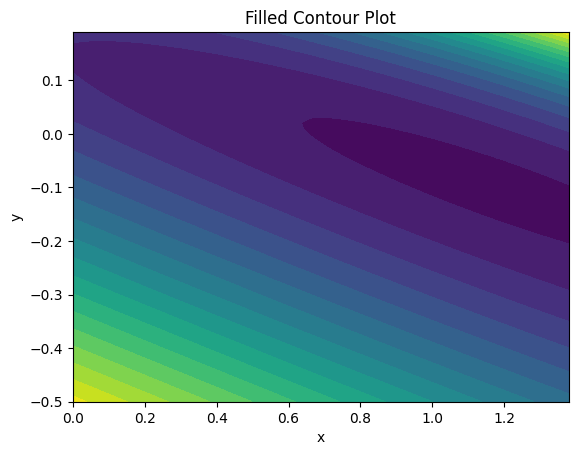

In [8]:
## generate contour plot
x_grid = np.arange(0, 1.4, 0.02)
x_length = len(x_grid)
y_grid = np.arange(-0.5, 0.2, 0.01)
y_length = len(y_grid)

z_contour = np.zeros((x_length, y_length))

for i in range(x_length):
    for j in range(y_length):
        z_contour[i, j] = poisson_loglik([x_grid[i], y_grid[j]])

## generate filled contour plot
plt.contourf(x_grid, y_grid, z_contour.T, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Filled Contour Plot')
plt.show()


### NLOPT

* Third-party standalone solvers 
* [`NLopt`](http://ab-initio.mit.edu/wiki/index.php/NLopt_Installation)
* [Extensive list of algorithms](http://ab-initio.mit.edu/wiki/index.php/NLopt_Algorithms#SLSQP)


### Example

We first carry out the Nelder-Mead algorithm in NLOPT.


In [9]:
import nlopt

# Define the objective function with gradient for nlopt
def poisson_loglik_grad_nlopt(b, grad):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * np.log(lambda_))
    if grad.size > 0:
        grad[:] = -(X.T @ (y - lambda_))
    return ell

# Set up the optimization problem
opt = nlopt.opt(nlopt.LD_LBFGS, X.shape[1]) # is the dimension of the parameter X.shape[1]
opt.set_min_objective(poisson_loglik_grad_nlopt)
opt.set_xtol_rel(1e-7)

# Set the initial parameter values
b_init = np.zeros(X.shape[1])

# Run the optimization
b_opt = opt.optimize(b_init)
minf = opt.last_optimum_value()

# Print the optimization result
print(f"Optimized parameters: {b_opt}")
print(f"Minimum value of the objective function: {minf}")

Optimized parameters: [ 1.17739744 -0.09993984]
Minimum value of the objective function: 261.1140782953287


C:\Users\zhent\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


* To invoke BFGS in NLOPT, we must code up the gradient $s(\beta)$.
* It was an error-prone task for humans.
* In AI time, it becomes much easier for standard models.
* AI is not panacea!

## Convex Optimization

* Local minimum is a global minimum.
* Particularly important in high-dimensional problems
* [Boyd and Vandenberghe (2004)](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)
* "Convex optimization is technology; all other optimizations are arts."

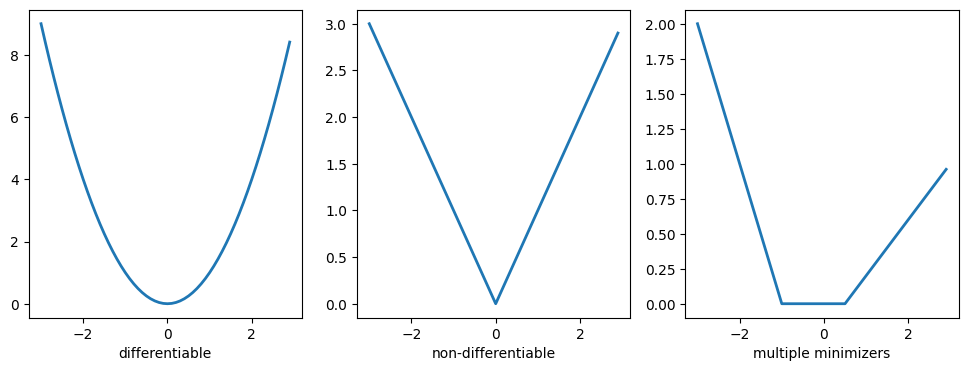

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the functions
f1 = lambda x: x ** 2
f2 = lambda x: np.abs(x)
f3 = lambda x: np.where(x <= -1, (-x - 1), np.where(x >= 0.5, 0.4 * x - 0.2, 0))

# Set up the plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot f1
x_base = np.arange(-3, 3, 0.1)
axs[0].plot(x_base, f1(x_base), lw=2)
axs[0].set_xlabel('differentiable')

# Plot f2
axs[1].plot(x_base, f2(x_base), lw=2)
axs[1].set_xlabel('non-differentiable')

# Plot f3
axs[2].plot(x_base, f3(x_base), lw=2)
axs[2].set_xlabel('multiple minimizers')
plt.show()


### Example

* Linear regression model MLE


* Normal MLE. The (negative) log-likelihood 

$$
\ell (\beta, \sigma) = \log \sigma + \frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - x_i' \beta)^2
$$

is not convex

* Re-parameterize the criterion function by $\gamma = 1/\sigma$ and $\alpha = \beta / \sigma$, then

$$
\ell (\alpha, \gamma) = -\log \gamma + \frac{1}{2}
\sum_{i=1}^n (\gamma y_i - x_i' \alpha)^2
$$

is convex in $\alpha, \gamma$

* Many MLE estimators in econometric textbooks are convex. 


## Example

The criterion function of Lasso estimation is given by:

$$
\min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^n (y_i - X_i \beta)^2 + \lambda \|\beta\|_1 \right\}
$$

In [12]:
import numpy as np
import cvxpy as cp

import matplotlib.pyplot as plt


# Generate synthetic data
n = 100  # number of samples
p = 20   # number of features
X = np.random.randn(n, p)

# create a sparse coefficient vector of p dimensions

beta_true = np.zeros(p)
beta_true[0:2] = 1

y = X @ beta_true + 0.5 * np.random.randn(n)

# Define the Lasso problem
beta = cp.Variable(p)
lambda_ = cp.Parameter(nonneg=True)
objective = cp.Minimize(0.5 * cp.sum_squares(X @ beta - y) + lambda_ * cp.norm1(beta))
problem = cp.Problem(objective)

# Solve the problem for a range of lambda values
lambda_vals = np.logspace(-2, 3, 100)
beta_vals = []

for val in lambda_vals:
    lambda_.value = val
    problem.solve()
    beta_vals.append(beta.value)

# Convert results to numpy array for plotting
beta_vals = np.array(beta_vals)


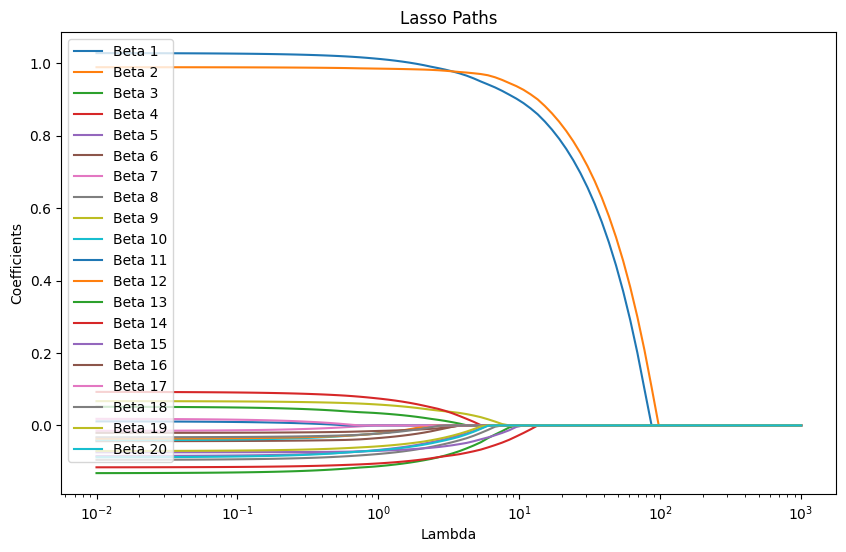

In [13]:

# Plot the coefficient paths
plt.figure(figsize=(10, 6))
for i in range(p):
    plt.plot(lambda_vals, beta_vals[:, i], label=f'Beta {i+1}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.legend()
plt.show()